# Assignment 2: Data Parsing, Cleansing and Integration
## Task 3
#### Student Name: Pratham Radhakrishna
#### Student ID: S3997064



## Introduction
Objectives:

The primary objective of Task 3 was to integrate two datasets: the cleaned dataset from Task 2 and a new dataset that was provided. This involved resolving schema conflicts, merging the datasets, and ensuring the integrated data maintained high quality and consistency.

Problems Tackled:
Schema Conflicts: The task involved identifying and resolving any schema conflicts between the two datasets to ensure they could be seamlessly merged.

Data Integration: The task required merging the two datasets into a single unified table while maintaining data integrity.

Handling Missing Values: Ensuring that any missing values in the new dataset were appropriately handled before integration.

Problems Discovered:
Schema Differences: Differences in column names and formats between the two datasets, such as Clothing ID vs. ClothID, Title vs. Review Title, etc.
Missing Values: Missing entries in several columns of the new dataset, including Title, Division Name, Department Name, and Class Name.
Spelling Mistakes and Inconsistencies: Inconsistent and incorrect spellings in categorical columns such as Section, Department, and Category.
Duplications: Duplicate rows with identical values across all columns in the integrated dataset.

Approaches Chosen:
Schema Alignment: Renamed columns to match the schema of both the datasets ensuring consistency in column names and formats.

Handling Missing Values:
Filled missing values in Title with a placeholder "No Title".
Filled missing values in Division Name, Department Name, and Class Name with their respective modes (most frequent values).

Correcting Spelling Mistakes: Created mapping dictionaries to correct known typos and inconsistencies in categorical columns.

Merging Datasets: Used Pandas concat method to merge the two datasets into a single unified DataFrame.

Removing Duplicates: Identified and removed duplicate rows to ensure each entry in the integrated dataset was unique.

Creating a Global Key: Generated a unique identifier for each row and combined it with ClothID to create a robust global key, ensuring each row could be uniquely identified.

##  Import libraries 

In [1]:
# Code to import libraries as you need in this assessment
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### 1. Examining and loading data
 

In [2]:
#upload both the files 

df1=pd.read_csv('s3997064_dataset1_solution.csv')
df2=pd.read_csv("S3997064_dataset2.csv")
df2.head()

Clothing ID  Age                                           Title  Rating  \
0         1086   34                                       Too short       3   
1         1027   33                           Not good for big hips       4   
2          839   41  Very short shirt - gorgeous for shorter folks!       4   
3         1078   47                                    Great dress!       5   
4          818   32                                             NaN       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                0                        2       General         Dresses   
1                1                        4       General         Bottoms   
2                1                       21       General            Tops   
3                1                        0       General         Dresses   
4                1                        4       General            Tops   

  Class Name  Active Time       Price  
0    Dresses    13.103834   50.427087  
1      Jeans    14.837656  128.829432  
2    Blouses    13.160333   61.764744  
3    Dresses     8.628571  141.937834  
4    Blouses     4.591404   74.864511

In [3]:
#lets round up the decimal value for Active time and price
df2['Price'] = df2['Price'].round(2)
df2['Active Time'] = df2['Active Time'].round(2)
df2.head()

Clothing ID  Age                                           Title  Rating  \
0         1086   34                                       Too short       3   
1         1027   33                           Not good for big hips       4   
2          839   41  Very short shirt - gorgeous for shorter folks!       4   
3         1078   47                                    Great dress!       5   
4          818   32                                             NaN       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                0                        2       General         Dresses   
1                1                        4       General         Bottoms   
2                1                       21       General            Tops   
3                1                        0       General         Dresses   
4                1                        4       General            Tops   

  Class Name  Active Time   Price  
0    Dresses        13.10   50.43  
1      Jeans        14.84  128.83  
2    Blouses        13.16   61.76  
3    Dresses         8.63  141.94  
4    Blouses         4.59   74.86

In [4]:
#examin the df2 file
print(df2.dtypes)

Clothing ID                  int64
Age                          int64
Title                       object
Rating                       int64
Recommended IND              int64
Positive Feedback Count      int64
Division Name               object
Department Name             object
Class Name                  object
Active Time                float64
Price                      float64
dtype: object


In [5]:
# Inspect the schemas
print("Schema of Dataset 1:")
print(df1.info())
print("\nSchema of Dataset 2:")
print(df2.info())

Schema of Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClothID                6446 non-null   int64  
 1   Age                    6446 non-null   int64  
 2   Review Title           6446 non-null   object 
 3   Customer Rating        6446 non-null   int64  
 4   Positive Review Count  6446 non-null   int64  
 5   Section                6446 non-null   object 
 6   Department             6446 non-null   object 
 7   Category               6446 non-null   object 
 8   Online Time            6446 non-null   float64
 9   Cost                   6446 non-null   float64
 10  Recommended IND        6446 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 554.1+ KB
None

Schema of Dataset 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns)

In [6]:
df2.isnull().sum()

Clothing ID                   0
Age                           0
Title                      1216
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 5
Department Name               5
Class Name                    5
Active Time                   0
Price                         0
dtype: int64

we can see there are null values in the dataset. however i will resolve them in the later part of the assignment 

### 2. Resolving schema conflicts


The primary differences are in the column names. The actual data types and meanings of the columns are consistent between the two datasets. 

#### Conflict 1: Name difference of the columns 
ClothID	       Clothing ID
Age  	           Age
Review Title	 Title
Customer Rating	 Rating
Positive Review Count	Positive Feedback Count
Section	         Division Name
Department	    Department Name
Category	    Class Name
Online Time	      Active Time
Cost	          Price
Recommended IND	Recommended IND

In [7]:
# Rename columns in df2 to match the schema of df1
df2.rename(columns={
    'Clothing ID': 'ClothID',
    'Title': 'Review Title',
    'Rating': 'Customer Rating',
    'Positive Feedback Count': 'Positive Review Count',
    'Division Name': 'Section',
    'Department Name': 'Department',
    'Class Name': 'Category',
    'Active Time': 'Online Time',
    'Price': 'Cost'
}, inplace=True)
# Verify renaming
print("\nSchema of Dataset 2 after renaming:") 
print(df2.info())


Schema of Dataset 2 after renaming:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClothID                7500 non-null   int64  
 1   Age                    7500 non-null   int64  
 2   Review Title           6284 non-null   object 
 3   Customer Rating        7500 non-null   int64  
 4   Recommended IND        7500 non-null   int64  
 5   Positive Review Count  7500 non-null   int64  
 6   Section                7495 non-null   object 
 7   Department             7495 non-null   object 
 8   Category               7495 non-null   object 
 9   Online Time            7500 non-null   float64
 10  Cost                   7500 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 644.7+ KB
None


### 3. Merging data



In [8]:

# Merge the datasets
merged_df = pd.concat([df1, df2], ignore_index=True)

In [9]:
merged_df

ClothID  Age                         Review Title  Customer Rating  \
0         1081   38                Lightweight and flowy                5   
1         1110   29                      Nearly perfect!                5   
2         1059   39       Perfect summer statement piece                5   
3          975   36                 Nice wardrobe staple                4   
4          867   33   Great staple with a little detail.                5   
...        ...  ...                                  ...              ...   
13941      844   50                         Feminine top                4   
13942     1065   46                     All legs jumper!                3   
13943     1080   32                        Bohemian chic                3   
13944     1078   30          Ehhh... it's fine, i guess.                3   
13945      868   33  Comfortably free in beautiful hues.                5   

       Positive Review Count         Section Department Category  Online Time  \
0                         44  General Petite    Dresses  Dresses         3.70   
1                          1         General    Dresses  Dresses         4.56   
2                          1  General Petite    Bottoms    Pants        11.91   
3                          0  General Petite    Jackets  Jackets         7.51   
4                         10         General       Tops    Knits         7.90   
...                      ...             ...        ...      ...          ...   
13941                      2  General Petite       Tops  Blouses         8.10   
13942                      0         General    Bottoms    Pants        19.78   
13943                      0         General    Dresses  Dresses         4.02   
13944                      0  General Petite    Dresses  Dresses        21.72   
13945                      0         General       Tops    Knits        10.86   

         Cost  Recommended IND  
0       87.56                1  
1      109.03                1  
2      106.63                1  
3      126.52                1  
4       78.34                1  
...       ...              ...  
13941   48.69                1  
13942   73.76                0  
13943   75.36                1  
13944  121.88                0  
13945   47.28                1  

[13946 rows x 11 columns]

### 4. Resolving data conflicts:


#### Conflict 1: Null Values 


In [10]:
merged_df.isnull().sum()

ClothID                     0
Age                         0
Review Title             1216
Customer Rating             0
Positive Review Count       0
Section                     5
Department                  5
Category                    5
Online Time                 0
Cost                        0
Recommended IND             0
dtype: int64

It replaces any missing values in the Review Title column with the placeholder "No Title". For the Section, Department, and Category columns, it fills missing values with the most frequent value (mode) of the respective column.

In [11]:
merged_df['Review Title'].fillna('No Title', inplace=True)
merged_df['Section'].fillna(merged_df['Section'].mode()[0], inplace=True)
merged_df['Department'].fillna(merged_df['Department'].mode()[0], inplace=True)
merged_df['Category'].fillna(merged_df['Category'].mode()[0], inplace=True)

In [12]:
#check for missing values
merged_df.isnull().sum()

ClothID                  0
Age                      0
Review Title             0
Customer Rating          0
Positive Review Count    0
Section                  0
Department               0
Category                 0
Online Time              0
Cost                     0
Recommended IND          0
dtype: int64

In [13]:
print(merged_df.describe(include='all'))

             ClothID           Age Review Title  Customer Rating  \
count   13946.000000  13946.000000        13946     13946.000000   
unique           NaN           NaN         9386              NaN   
top              NaN           NaN     No Title              NaN   
freq             NaN           NaN         1216              NaN   
mean      920.050982     43.176681          NaN         4.194823   
std       201.127562     12.336377          NaN         1.103002   
min         1.000000      1.000000          NaN         1.000000   
25%       861.000000     34.000000          NaN         4.000000   
50%       936.000000     41.000000          NaN         5.000000   
75%      1078.000000     52.000000          NaN         5.000000   
max      1205.000000     94.000000          NaN         5.000000   

        Positive Review Count  Section Department Category   Online Time  \
count            13946.000000    13946      13946    13946  13946.000000   
unique                    NaN  

#### Conflict 2: Outliers
Positive Review Count:

The maximum value is 117, which seems unusually high compared to the mean (2.586) and standard deviation (5.796). This could indicate potential outliers.

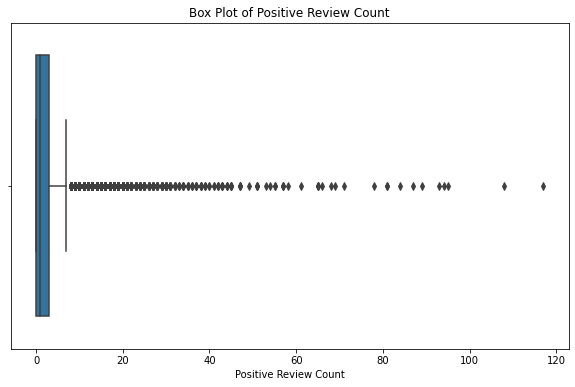

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['Positive Review Count'])
plt.title('Box Plot of Positive Review Count')
plt.xlabel('Positive Review Count')
plt.show()

In [15]:
#function to identify outlier values 
def identify_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
outliers_positive_review_count = identify_outliers(merged_df, 'Positive Review Count')
print("Outliers in Positive Review Count:")
print(outliers_positive_review_count[['ClothID', 'Positive Review Count']])

Outliers in Positive Review Count:
       ClothID  Positive Review Count
0         1081                     44
4          867                     10
9          868                      8
15         835                     25
16        1110                      9
...        ...                    ...
13888      834                     16
13889      977                     21
13917     1078                     11
13920      873                     14
13936      895                     27

[1298 rows x 2 columns]


In [16]:
# Cap outliers in Positive Review Count
q1 = merged_df['Positive Review Count'].quantile(0.25)
q3 = merged_df['Positive Review Count'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
merged_df['Positive Review Count'] = merged_df['Positive Review Count'].clip(lower=lower_bound, upper=upper_bound)

# Conflict 3: Spelling Mistakes
we have spelling mistakes in columns: Section,Department and Category

In [17]:
merged_df['Section'].value_counts()

General           8272
General Petite    4807
Initmates          464
Intimates          403
Name: Section, dtype: int64

In [18]:
merged_df['Department'].value_counts()

Tops         6204
Dresses      3799
Bottoms      2269
Jackets       606
Intimate      542
Intimates     454
Trend          72
Name: Department, dtype: int64

In [19]:
merged_df['Category'].value_counts()

Dresses           3804
Knits             2849
Blouses           1853
Pants              834
Sweaters           834
Jeans              684
Skirts             558
Jackets            420
Lounge             399
Fine gauge         346
Fine Gauge         317
Swim               200
Shorts             192
Outerwear          186
Sleep              122
Legwear             95
Intimates           93
Layering            86
Trend               72
Chemises             1
Casual bottoms       1
Name: Category, dtype: int64

In [20]:
# Define mapping dictionaries for corrections
section_corrections = {
    'Initmates': 'Intimates'
}

department_corrections = {
    'Intimate': 'Intimates'
}

category_corrections = {
    'Fine gauge': 'Fine Gauge',
    'Casual bottoms': 'Casual Bottoms'
}

# Apply the corrections
merged_df['Section'] = merged_df['Section'].replace(section_corrections)
merged_df['Department'] = merged_df['Department'].replace(department_corrections)
merged_df['Category'] = merged_df['Category'].replace(category_corrections)

# Verify corrections
print("Unique values in Section column after correction:\n", merged_df['Section'].value_counts())
print("\nUnique values in Department column after correction:\n", merged_df['Department'].value_counts())
print("\nUnique values in Category column after correction:\n", merged_df['Category'].value_counts())

Unique values in Section column after correction:
 General           8272
General Petite    4807
Intimates          867
Name: Section, dtype: int64

Unique values in Department column after correction:
 Tops         6204
Dresses      3799
Bottoms      2269
Intimates     996
Jackets       606
Trend          72
Name: Department, dtype: int64

Unique values in Category column after correction:
 Dresses           3804
Knits             2849
Blouses           1853
Pants              834
Sweaters           834
Jeans              684
Fine Gauge         663
Skirts             558
Jackets            420
Lounge             399
Swim               200
Shorts             192
Outerwear          186
Sleep              122
Legwear             95
Intimates           93
Layering            86
Trend               72
Casual Bottoms       1
Chemises             1
Name: Category, dtype: int64


# Conflict 4: Duplicate Values

In [21]:
# Define the columns to check for duplicates
columns_to_check = ['ClothID', 'Age', 'Review Title', 'Customer Rating', 'Positive Review Count', 'Section', 'Department', 'Category', 'Online Time', 'Cost', 'Recommended IND']

# Identify duplicates based on the specified columns
duplicates = merged_df[merged_df.duplicated(subset=columns_to_check, keep=False)]

# Display the duplicate rows
print(f"Number of duplicate rows based on specified columns: {len(duplicates)}")
print("Duplicate rows based on specified columns:")
print(duplicates)

Number of duplicate rows based on specified columns: 328
Duplicate rows based on specified columns:
       ClothID  Age                         Review Title  Customer Rating  \
0         1081   38                Lightweight and flowy                5   
1         1110   29                      Nearly perfect!                5   
2         1059   39       Perfect summer statement piece                5   
3          975   36                 Nice wardrobe staple                4   
4          867   33   Great staple with a little detail.                5   
...        ...  ...                                  ...              ...   
13941      844   50                         Feminine top                4   
13942     1065   46                     All legs jumper!                3   
13943     1080   32                        Bohemian chic                3   
13944     1078   30          Ehhh... it's fine, i guess.                3   
13945      868   33  Comfortably free in beautiful hu

In [22]:
#remove duplicates
merged_df = merged_df.drop_duplicates(subset=columns_to_check)
merged_df

ClothID  Age                        Review Title  Customer Rating  \
0         1081   38               Lightweight and flowy                5   
1         1110   29                     Nearly perfect!                5   
2         1059   39      Perfect summer statement piece                5   
3          975   36                Nice wardrobe staple                4   
4          867   33  Great staple with a little detail.                5   
...        ...  ...                                 ...              ...   
13914      825   40                            No Title                5   
13917     1078   50                            No Title                5   
13924      715   40                            No Title                5   
13925      895   35                            No Title                5   
13939     1119   39                            No Title                5   

       Positive Review Count         Section Department    Category  \
0                        7.5  General Petite    Dresses     Dresses   
1                        1.0         General    Dresses     Dresses   
2                        1.0  General Petite    Bottoms       Pants   
3                        0.0  General Petite    Jackets     Jackets   
4                        7.5         General       Tops       Knits   
...                      ...             ...        ...         ...   
13914                    6.0  General Petite       Tops     Blouses   
13917                    7.5         General    Dresses     Dresses   
13924                    0.0       Intimates  Intimates      Lounge   
13925                    0.0         General       Tops  Fine Gauge   
13939                    0.0         General    Jackets   Outerwear   

       Online Time    Cost  Recommended IND  
0             3.70   87.56                1  
1             4.56  109.03                1  
2            11.91  106.63                1  
3             7.51  126.52                1  
4             7.90   78.34                1  
...            ...     ...              ...  
13914        11.38   78.89                1  
13917        10.71  115.83                1  
13924         4.86   75.30                1  
13925        11.76   58.71                1  
13939         9.27  153.93                1  

[13782 rows x 11 columns]

......

#### Finding global key for the data
ClothID identifies the specific clothing item.
Online Time captures the unique time each review was written, down to the second, which minimizes the likelihood of identical entries, especially when combined with ClothID.
 (ClothID + Online Time): Combines the item identifier with the time spent reviewing, making the combination unique across different rows.

In [23]:

# Create a temporary key by combining ClothID and Online Time as strings
duplicate_mask = merged_df.duplicated(subset=['ClothID', 'Online Time'], keep=False)

# Filter the DataFrame to show only duplicate rows based on the combination
duplicates = merged_df[duplicate_mask]

print(duplicates)

merged_df = merged_df[~duplicate_mask]
merged_df

       ClothID  Age               Review Title  Customer Rating  \
7          819   33  Perfect for fall layering                5   
19        1094   37        Great for pregnancy                5   
31        1081   51       Cute but didn't work                4   
37        1077   46            Huge, even xxsp                2   
38         867   30          Not my cup of tee                1   
...        ...  ...                        ...              ...   
13728      820   53           So disappointed!                3   
13735     1094   38            Looks better on                5   
13788     1094   47                   No Title                4   
13848      863   69                   No Title                5   
13866      868   61                   No Title                5   

       Positive Review Count         Section Department Category  Online Time  \
7                        3.0         General       Tops  Blouses        7.900   
19                       2.0     

ClothID  Age                        Review Title  Customer Rating  \
0         1081   38               Lightweight and flowy                5   
1         1110   29                     Nearly perfect!                5   
2         1059   39      Perfect summer statement piece                5   
3          975   36                Nice wardrobe staple                4   
4          867   33  Great staple with a little detail.                5   
...        ...  ...                                 ...              ...   
13914      825   40                            No Title                5   
13917     1078   50                            No Title                5   
13924      715   40                            No Title                5   
13925      895   35                            No Title                5   
13939     1119   39                            No Title                5   

       Positive Review Count         Section Department    Category  \
0                        7.5  General Petite    Dresses     Dresses   
1                        1.0         General    Dresses     Dresses   
2                        1.0  General Petite    Bottoms       Pants   
3                        0.0  General Petite    Jackets     Jackets   
4                        7.5         General       Tops       Knits   
...                      ...             ...        ...         ...   
13914                    6.0  General Petite       Tops     Blouses   
13917                    7.5         General    Dresses     Dresses   
13924                    0.0       Intimates  Intimates      Lounge   
13925                    0.0         General       Tops  Fine Gauge   
13939                    0.0         General    Jackets   Outerwear   

       Online Time    Cost  Recommended IND  
0             3.70   87.56                1  
1             4.56  109.03                1  
2            11.91  106.63                1  
3             7.51  126.52                1  
4             7.90   78.34                1  
...            ...     ...              ...  
13914        11.38   78.89                1  
13917        10.71  115.83                1  
13924         4.86   75.30                1  
13925        11.76   58.71                1  
13939         9.27  153.93                1  

[12363 rows x 11 columns]

.......

### 5. Saving the integrated and reshaped data
The last part of the integration process is to export our output data to csv format, named as:
- '\<student\_id\>_dataset_integrated.csv'

In [24]:
# code to save output data
merged_df.to_csv("s3997064_dataset_integrated.csv", index=False)

## Summary of the Assessment Task
Involved integrating two datasets into a single unified table by resolving schema conflicts, handling missing values, correcting spelling mistakes, and removing duplicates. By implementing these approaches, the integrated dataset was transformed into a clean and structured format, ready for further analysis and use. The creation of a global key ensured that each row in the dataset could be uniquely identified, maintaining data integrity and consistency.